In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score

In [243]:
#importation des données
data=pd.read_excel("Coeur.xlsx")

In [244]:
#copie des données 
df=data.copy()

In [245]:
df.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


# 1-verification de doublon et suppression 

In [246]:
#duplicated permet de verifier si des lignes sont identique et sum permet de compter toute les lignes qui sont dupliqué
df.duplicated().sum()

0

# 2- vérification des valeurs manquantes 

In [247]:
#vérification de valeurs manquantes
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

# 3-vérification des constantes et si oui suppression

In [248]:
#vérification de constante
def constante(df):
    list_const=[]
    for col in df.columns:
        if len(df[col].unique())<1:
            list_const.append(col)
        else:
            pass
    return len(list_const)
            
        
#df.nunique()    

In [249]:
constante(df)

0

# 4- récodons les variables qualitative

In [250]:
#division de nos feature en variable qualitative et numerique
var_numer=df._get_numeric_data().columns
var_qual=list(set(df.columns) - set(var_numer))

In [251]:
# l'encodage des variables qualitative
def recoder(serie):
    return serie.astype('category').cat.codes

In [252]:
def encodage(df):
    for  i in df.select_dtypes("object").columns:
        df[i]=recoder(df[i])
    return df

In [253]:
encodage(df)
    

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,0,140,289,0,1,172,0,0.0,0,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,0,130,283,0,2,98,0,0.0,0,0
3,48,0,1,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,264,0,1,132,0,1.2,2,1
914,68,1,1,144,193,1,1,141,0,3.4,2,1
915,57,1,1,130,131,0,1,115,1,1.2,2,1
916,57,0,0,130,236,0,0,174,0,0.0,2,1


# NORMALISATION DES VARIABLES QUANTITATIVES

In [254]:
def normalisation(df):
    for col in var_numer:
        if col=='CŒUR':
            pass
        else:
             
            df[col]=df[col]/df[col].max()
    return df

In [255]:
normalisation(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.584416,1,2,0.55,0.437811,0.0,1,0.653465,0,0.193548,2,1
914,0.883117,1,1,0.72,0.320066,1.0,1,0.698020,0,0.548387,2,1
915,0.740260,1,1,0.65,0.217247,0.0,1,0.569307,1,0.193548,2,1
916,0.740260,0,0,0.65,0.391376,0.0,0,0.861386,0,0.000000,2,1


# Division des données en train et test

In [256]:
# division de notre dataset en feature et target
X=df.drop("CŒUR",axis=1)

In [257]:
Y=df["CŒUR"]

In [258]:
# repatition de nos données en données d'entrainement train et de test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [259]:
# les dimensions de nos jeux données repartie
print("les dimensions de X_train sont {}".format(X_train.shape))
print("les dimensions de X_test sont {}".format(X_test.shape))
print("les dimensions de Y_train sont {}".format(Y_train.shape))
print("les dimensions de Y_test sont {}".format(Y_test.shape))

les dimensions de X_train sont (642, 11)
les dimensions de X_test sont (276, 11)
les dimensions de Y_train sont (642,)
les dimensions de Y_test sont (276,)


# ENTRAINEMENT DU MODEL

In [260]:
#choisir un model et l'instancié 
logisticRegr = LogisticRegression()

In [261]:
#entrainement de notre model
logisticRegr.fit(X_train, Y_train)

LogisticRegression()

In [262]:
prediction=logisticRegr.predict(X_test)

In [263]:
#le score de notre model
score = logisticRegr.score(X_test, Y_test)
print(score)

0.8695652173913043


# EVALUATION DE NOTRE MODEL

In [264]:
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.8711656441717791
Recall:  0.9044585987261147


# CONFUSION MATRIX

In [265]:
# la matrice de confusion pour mieux apprecier la performance de notre model
predict_value=pd.Series(logisticRegr.predict(X_test),name="prediction")
df_confusion = pd.crosstab(Y_test, predict_value)
df_confusion

prediction,0,1
CŒUR,,
0,16,28
1,11,16


<AxesSubplot:>

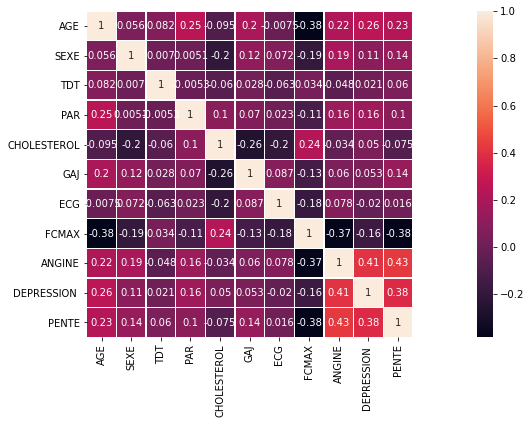

In [266]:
#verifions les corrélation de nos varialle
plt.figure(figsize=(23, 6))
sns.heatmap(X.corr(),
            square=True, linewidths=.4,annot=True)